In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression




In [2]:
# cargamos el dataset del modulo datasets de sklearn
# Estos datos están en formato Bunch, que es un formato similar a los diccionarios que contiene información sobre el conjunto de datos Iris, incluyendo sus características, etiquetas de clase, descripciones y más.

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Establecer directorio de trabajo
#os.getcwd()
os.chdir('C:\\Users\\Shirl\\OneDrive\\Documentos\\Inteligencia artificial')
os.getcwd()
print(os.listdir())


['.vscode', 'Actividad 1 - Conceptos y aplicaciones de Inteligencia Artificial.docx', 'Actividad 3.ipynb', 'Clase 2.ipynb', 'Clase 2.py', 'Clase 4.ipynb', 'diabetes.csv', 'Forbes 2000 2022.csv', 'prueba.ipynb']


In [4]:
#Importacion de datos
diabetes= pd.read_csv('diabetes.csv')

In [5]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


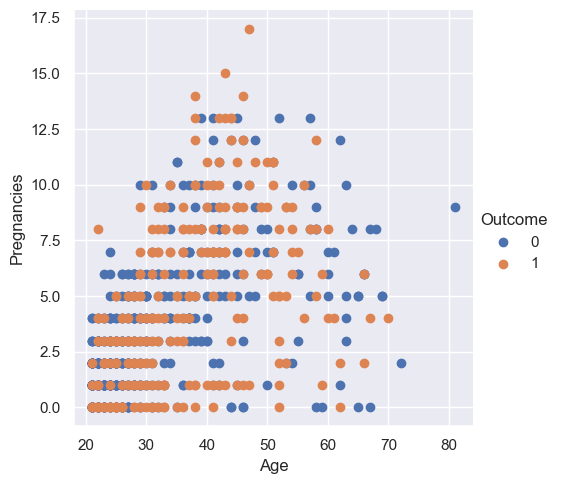

In [17]:
sns.FacetGrid(diabetes, hue="Outcome", height=5).map(plt.scatter, 'Age', 'Pregnancies').add_legend()
plt.show()

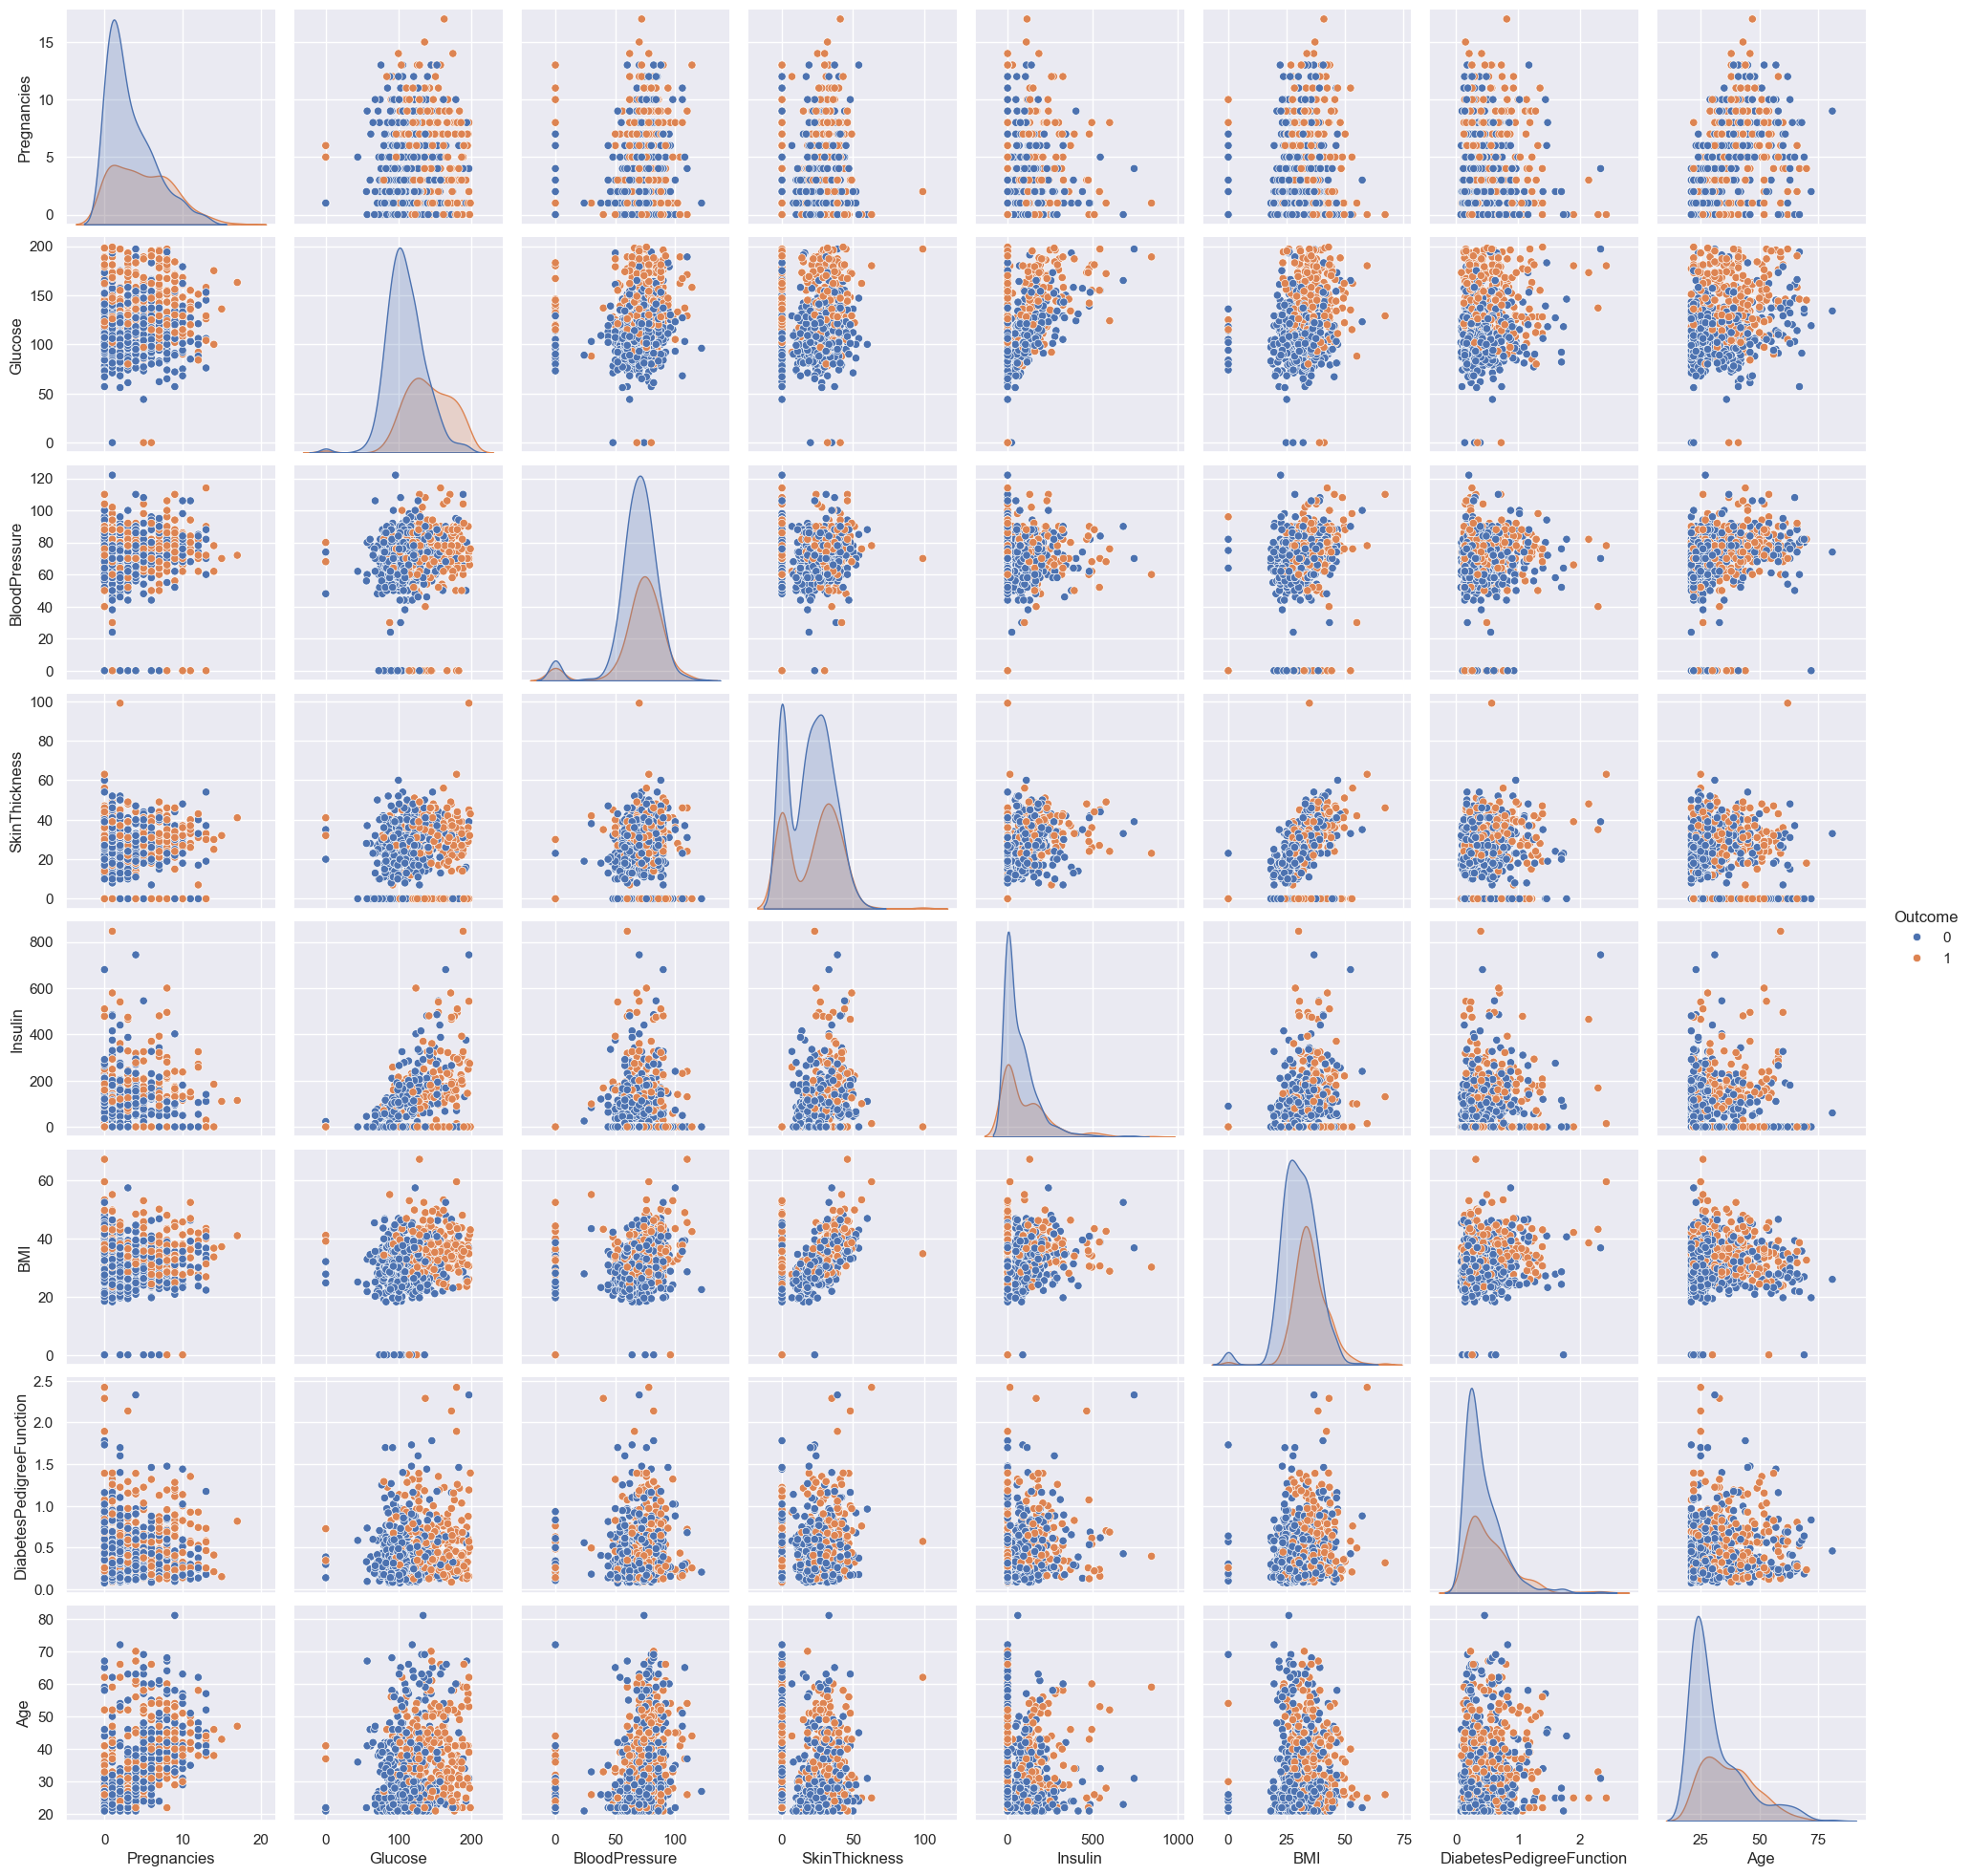

In [18]:
sns.pairplot(diabetes.iloc[:,:],hue='Outcome')
plt.show()

In [9]:
# Dividimos los datos en variables independientes X, y variable dependiente y (especies)
X = diabetes.drop(["Outcome"],axis = 1) #axis refiere a columna
y = diabetes.Outcome

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 1000) 

In [12]:
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
!pip install mlxtend

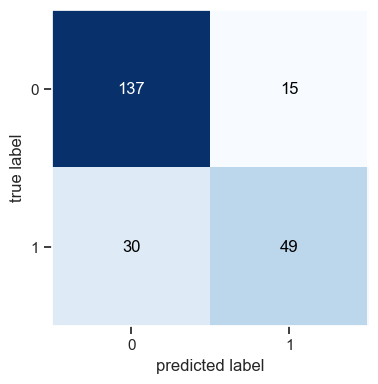

In [14]:
# Predicción del modelo

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

ypred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()

In [15]:
X_test.shape[0] == 15+17+13

False

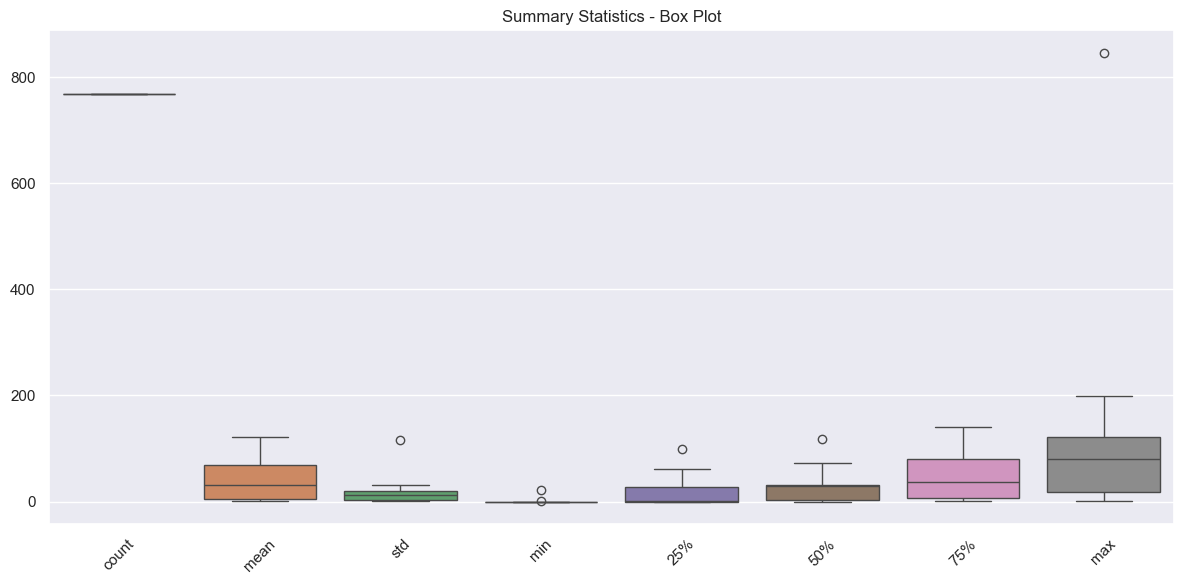

<Figure size 1800x900 with 0 Axes>

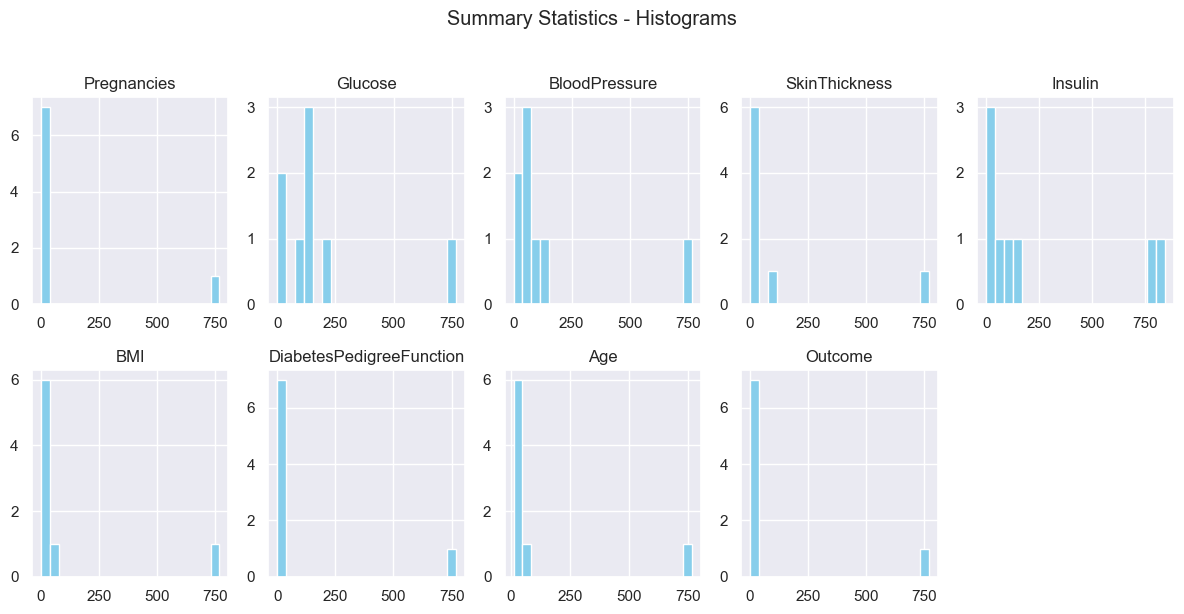

In [16]:
summary_stats = diabetes.describe()

# Visualize using box plots
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(data=summary_stats.transpose())
plt.title('Summary Statistics - Box Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize using histograms
plt.figure(figsize=(12, 6), dpi=150)
summary_stats.hist(bins=20, layout=(2, 5), figsize=(12, 6), color='skyblue')
plt.suptitle('Summary Statistics - Histograms', y=1.02)
plt.tight_layout()
plt.show()